# Задание 1: Работа с массивами NumPy

Цель: Проверить знание методов NumPy для анализа данных.

**Задание:**

1. Создайте массив случайных чисел (50 элементов) из диапазона [10, 100].
2. Найдите:
3. Среднее арифметическое массива.
4. Медиану.
5. Стандартное отклонение.
6. Создайте новый массив, где каждое число изначального массива делится на 3. Отфильтруйте числа, которые делятся без остатка.

**Ожидаемый ответ:**

* Вывод среднего, медианы, стандартного отклонения.
* Новый массив и его фильтр.


In [1]:
import numpy as np

# Создаем массив случайных чисел из диапазона [10, 100]
random_array = np.random.randint(10, 100, size=50)

# Находим среднее арифметическое массива
mean_value = np.mean(random_array)

# Находим медиану массива
median_value = np.median(random_array)

# Находим стандартное отклонение массива
std_deviation = np.std(random_array)

# Создаем новый массив, где каждое число изначального массива делится на 3
new_array = random_array / 3

# Фильтруем числа, которые делятся без остатка
filtered_array = new_array[new_array % 1 == 0]

# Выводим результаты
print("Среднее арифметическое:", mean_value)
print("\n")
print("Медиана:", median_value)
print("\n")
print("Стандартное отклонение:", std_deviation)
print("\n")
print("Новый массив:\n", new_array)
print("\n")
print("Отфильтрованный массив:", filtered_array)
print("\n")


Среднее арифметическое: 61.06


Медиана: 68.5


Стандартное отклонение: 26.70386488881338


Новый массив:
 [24.66666667 25.33333333  5.         19.66666667 28.33333333 32.33333333
 17.33333333 26.66666667 24.         25.         23.33333333  5.66666667
 11.         21.33333333 21.33333333 25.33333333 16.66666667 23.33333333
 32.33333333 30.66666667 11.66666667 32.         22.33333333 28.66666667
 12.33333333 31.66666667  6.66666667 23.33333333  6.66666667  7.33333333
 18.         16.         30.33333333 16.33333333 29.33333333 18.66666667
  3.33333333 31.66666667 10.         23.66666667 28.         32.
 12.66666667 20.33333333  9.         28.          7.33333333  4.66666667
 25.66666667 30.66666667]


Отфильтрованный массив: [ 5. 24. 25. 11. 32. 18. 16. 10. 28. 32.  9. 28.]




# Задание 2: Анализ данных с помощью Pandas

Цель: Проверить навыки анализа и обработки данных.

Данные: Используйте предоставленный CSV-файл ("sales_data_large.csv"), содержащий данные о продажах с полями:

date (дата продаж),
region (регион),
product (продукт),
sales (объем продаж).

**Задание:**

1. Загрузите данные из файла.
2. Определите:
   1. Общее количество записей.
   2. Какие регионы и продукты присутствуют в данных.
3. Подсчитайте:
   1. Общие продажи по регионам.
   2. Средний объем продаж для каждого продукта.
4. Постройте сводную таблицу, показывающую средние продажи по регионам и продуктам.

**Ожидаемый ответ:**

* Итоги анализа данных.
* Построенная сводная таблица.

In [2]:
import pandas as pd

data = pd.read_csv("data/sales_data_large.csv")

data.head()


,date,region,product,sales
0,2024-12-01,West,Widget C,246
1,2024-12-01,South,Widget B,152
2,2024-12-01,West,Widget B,391
3,2024-12-01,West,Widget A,272
4,2024-12-01,East,Widget A,337


In [3]:
total_records = data.shape[0]
print("Количество записей:", total_records)

Количество записей: 500


In [4]:
regions = data['region'].unique()
products = data['product'].unique()

print("Количество регионов:", len(regions))
print("Регионы:", regions)
print("\n")
print("Количество продуктов:", len(products))
print("Продукты:", products)

Количество регионов: 4
Регионы: ['West' 'South' 'East' 'North']


Количество продуктов: 3
Продукты: ['Widget C' 'Widget B' 'Widget A']


In [5]:
sales_by_region = data.groupby('region')['sales'].sum().sort_values(ascending=False)
sales_by_product = data.groupby('product')['sales'].sum().sort_values(ascending=False)
avg_sales_by_product = data.groupby('product')['sales'].mean()
avg_sales_by_region = data.groupby('region')['sales'].mean()
std_sales_by_product = data.groupby('product')['sales'].std()
std_sales_by_region = data.groupby('region')['sales'].std()

print("Продажи по регионам\n", sales_by_region)
print("\n")
print("Продажи по продуктам\n", sales_by_product)
print("\n")
print("Средние продажи по продуктам\n", avg_sales_by_product)
print("\n")
print("Средние продажи по регионам\n", avg_sales_by_region)
print("\n")
print("Стандартное отклонение продаж по продуктам\n", std_sales_by_product)
print("\n")
print("Стандартное отклонение продаж по регионам\n", std_sales_by_region)

Продажи по регионам
 region
North    39605
West     35171
South    33023
East     29244
Name: sales, dtype: int64


Продажи по продуктам
 product
Widget C    46250
Widget A    45445
Widget B    45348
Name: sales, dtype: int64


Средние продажи по продуктам
 product
Widget A    275.424242
Widget B    268.331361
Widget C    278.614458
Name: sales, dtype: float64


Средние продажи по регионам
 region
East     273.308411
North    278.908451
South    275.191667
West     268.480916
Name: sales, dtype: float64


Стандартное отклонение продаж по продуктам
 product
Widget A    126.856994
Widget B    130.787119
Widget C    130.724678
Name: sales, dtype: float64


Стандартное отклонение продаж по регионам
 region
East     129.150520
North    126.480448
South    132.949621
West     130.299912
Name: sales, dtype: float64


In [6]:
# Создаем сводную таблицу для отображения средних продаж по регионам и продуктам
pivot_table = data.pivot_table(
    values='sales',
    index='region',
    columns='product',
    aggfunc='mean'
)

pivot_table


product,Widget A,Widget B,Widget C
region,,,
East,291.464286,263.116279,271.361111
North,289.145833,238.477273,304.660000
South,277.380952,282.833333,263.722222
West,250.106383,291.550000,267.136364


# Задание 3: Очистка данных и визуализация

Цель: Проверить умение находить и исправлять ошибки в данных, а также визуализировать их.

Данные: Используйте предоставленный CSV-файл ("sales_cleaning_large.csv"), содержащий данные о продажах с возможными пропущенными и некорректными значениями. Поля:

date (дата продаж),
sales (объем продаж),
region (регион).

**Задание:**

1. Найдите и устраните ошибки в данных:
1. Заполните пропущенные даты.
2. Удалите отрицательные значения в столбце sales или замените их на медиану столбца.
3. Заполните пропущенные значения в sales средним значением.
4. Постройте график продаж по датам. Убедитесь, что даты упорядочены.

**Ожидаемый ответ:**

* Обработанный DataFrame.
* Построенный график.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv("data/sales_cleaning_large.csv")

def get_info(data: pd.DataFrame) -> None:
    """
    Функция df_info выводит информацию о DataFrame.
    """
    print(data.head())
    print(data.info())
    print(data.isnull().sum()) 

get_info(data)

         date  sales region
0  2024-12-01 -450.0   East
1  2024-12-01  400.0   East
2  2024-12-01 -100.0  South
3  2024-12-01  350.0   West
4  2024-12-02  400.0  South
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    190 non-null    object 
 1   sales   190 non-null    float64
 2   region  200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB
None
date      10
sales     10
region     0
dtype: int64


In [8]:
data

,date,sales,region
0,2024-12-01,-450.0,East
1,2024-12-01,400.0,East
2,2024-12-01,-100.0,South
3,2024-12-01,350.0,West
4,2024-12-02,400.0,South
...,...,...,...
195,NaN,400.0,West
196,NaN,-150.0,West
197,NaN,-500.0,South
198,NaN,-350.0,East


In [9]:
data['date'] = pd.to_datetime(data['date'])
get_info(data)

        date  sales region
0 2024-12-01 -450.0   East
1 2024-12-01  400.0   East
2 2024-12-01 -100.0  South
3 2024-12-01  350.0   West
4 2024-12-02  400.0  South
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    190 non-null    datetime64[ns]
 1   sales   190 non-null    float64       
 2   region  200 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.8+ KB
None
date      10
sales     10
region     0
dtype: int64


In [10]:
total_records = data.shape[0]
print("Количество записей:", total_records)

Количество записей: 200


In [11]:
regions = data['region'].unique()
sales = data['sales'].unique()
dates = data['date'].unique()

print("Количество регионов:", len(regions))
print("Регионы:", regions)
print("\n")
print("Количество Продаж:", len(sales))
print("Продажи:", sales)
print("\n")
print("Количество дат:", len(dates))
print("Даты:", dates)

Количество регионов: 4
Регионы: ['East' 'South' 'West' 'North']


Количество Продаж: 21
Продажи: [-450.  400. -100.  350.   50.  250.  -50. -250. -200. -150.   nan  100.
 -300. -350.    0.  200. -500.  450.  300.  150. -400.]


Количество дат: 32
Даты: <DatetimeArray>
['2024-12-01 00:00:00', '2024-12-02 00:00:00', '2024-12-03 00:00:00',
 '2024-12-04 00:00:00', '2024-12-05 00:00:00', '2024-12-06 00:00:00',
 '2024-12-07 00:00:00', '2024-12-08 00:00:00', '2024-12-09 00:00:00',
 '2024-12-10 00:00:00', '2024-12-11 00:00:00', '2024-12-12 00:00:00',
 '2024-12-13 00:00:00', '2024-12-14 00:00:00', '2024-12-15 00:00:00',
 '2024-12-16 00:00:00', '2024-12-17 00:00:00', '2024-12-18 00:00:00',
 '2024-12-19 00:00:00', '2024-12-20 00:00:00', '2024-12-21 00:00:00',
 '2024-12-22 00:00:00', '2024-12-23 00:00:00', '2024-12-24 00:00:00',
 '2024-12-25 00:00:00', '2024-12-26 00:00:00', '2024-12-27 00:00:00',
 '2024-12-28 00:00:00', '2024-12-29 00:00:00', '2024-12-30 00:00:00',
 '2024-12-31 00:00:00',        

In [12]:
# Заполнение пропущенных дат
# Воспользуемя встроеным методом Pandas, чтобы заполнить пропущенные значения
# ffill: Использует предыдущее известное значение для заполнения пропусков.
data['date'] = data['date'].ffill()
get_info(data)
total_records = data.shape[0]
print("Количество записей:", total_records)


        date  sales region
0 2024-12-01 -450.0   East
1 2024-12-01  400.0   East
2 2024-12-01 -100.0  South
3 2024-12-01  350.0   West
4 2024-12-02  400.0  South
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    200 non-null    datetime64[ns]
 1   sales   190 non-null    float64       
 2   region  200 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.8+ KB
None
date       0
sales     10
region     0
dtype: int64
Количество записей: 200


In [13]:
# Заменяем отрицательные значения на медиану положительных значений
median_sales = data['sales'][data['sales'] > 0].median()
data['sales'] = data['sales'].apply(lambda x: median_sales if x < 0 else x)

# Заполняем пропущенные значения средним значением
mean_sales = data['sales'].mean()
data['sales'] = data['sales'].fillna(mean_sales)

get_info(data)



        date  sales region
0 2024-12-01  250.0   East
1 2024-12-01  400.0   East
2 2024-12-01  250.0  South
3 2024-12-01  350.0   West
4 2024-12-02  400.0  South
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    200 non-null    datetime64[ns]
 1   sales   200 non-null    float64       
 2   region  200 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.8+ KB
None
date      0
sales     0
region    0
dtype: int64


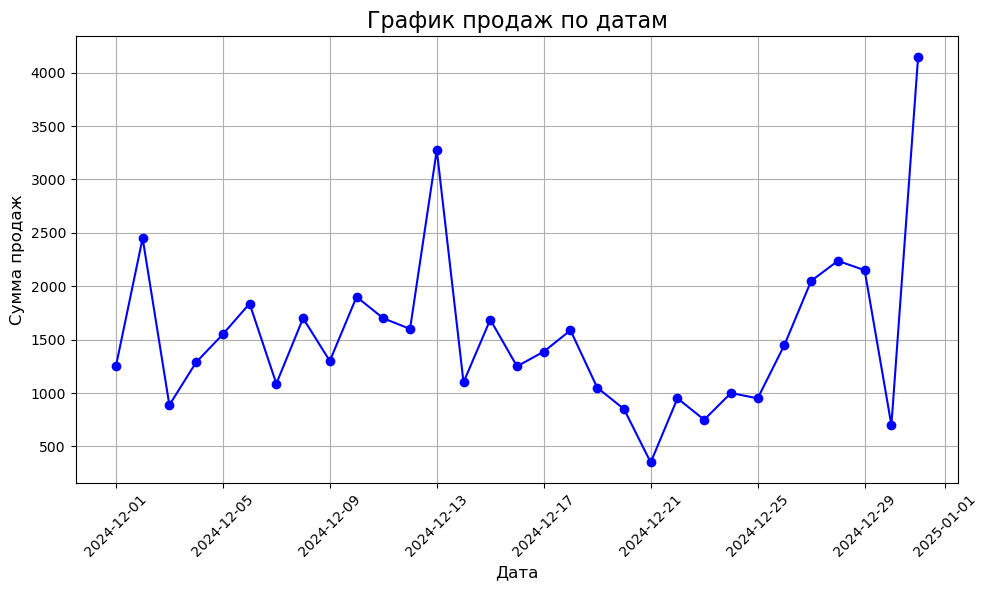

In [14]:
# Группировка данных по дате и суммирование продаж
grouped_data = data.groupby('date')['sales'].sum().reset_index()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['date'], grouped_data['sales'], marker='o', linestyle='-', color='b')
plt.title('График продаж по датам', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Сумма продаж', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('charts/sales_by_date.png', dpi=300)
plt.show()


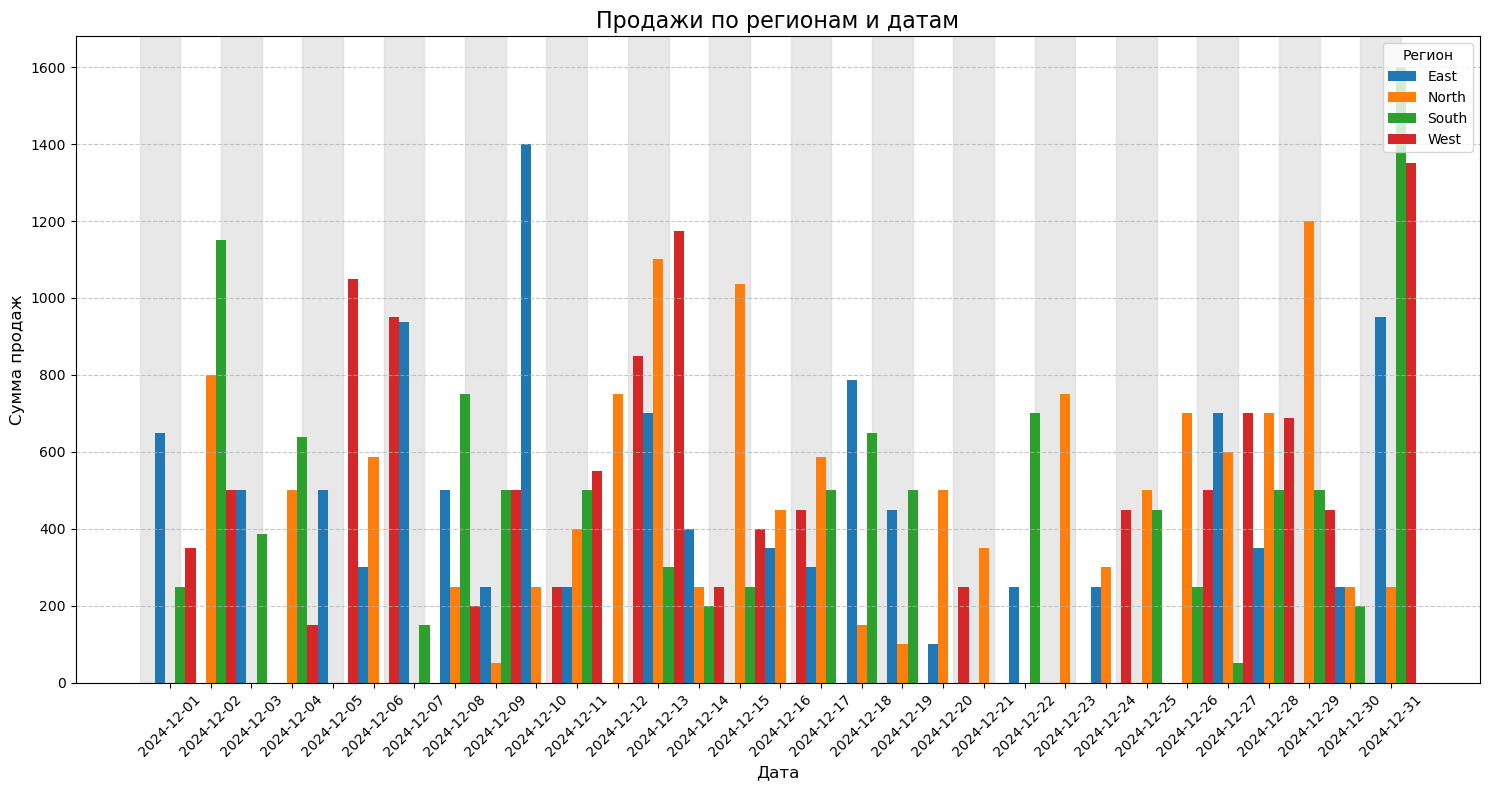

In [15]:
# Сгруппировать данные по дате и региону
sales_by_region = data.groupby(['date', 'region'])['sales'].sum().unstack()

# Настройка ширины столбцов
x = sales_by_region.index  # Даты
regions = sales_by_region.columns  # Регионы
bar_width = 0.25
positions = np.arange(len(x))

fig, ax = plt.subplots(figsize=(15, 8))

# Чередование фона
for i in range(len(x)):
    if i % 2 == 0:
        ax.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.5)

# Построение столбцов для каждого региона
for i, region in enumerate(regions):
    ax.bar(
        positions + i * bar_width,
        sales_by_region[region],
        width=bar_width,
        label=region
    )

# Настройка осей и подписей
ax.set_title('Продажи по регионам и датам', fontsize=16)
ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Сумма продаж', fontsize=12)
ax.set_xticks(positions + bar_width)
ax.set_xticklabels(x.strftime('%Y-%m-%d'), rotation=45)
ax.legend(title='Регион')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('charts/sales_by_region.png', dpi=300)
plt.show()


# Задание 4: Получение данных из API

Цель: Проверить способность работать с веб-данными.

**Задание:**

1. Используйте открытое API (например, https://jsonplaceholder.typicode.com/users).
2. Загрузите данные и создайте DataFrame с полями: id, name, email, company_name.
3. Выведите таблицу с пользователями, работающими в компаниях, название которых содержит слово "Group".

**Ожидаемый ответ:**

* DataFrame с результатами фильтрации.

In [16]:
import requests
import pandas as pd

# Загрузка данных из API
url = "https://jsonplaceholder.typicode.com/users"
response = requests.get(url)
data = response.json()

# Создание DataFrame с нужными полями
df = pd.DataFrame(data)
df = df[['id', 'name', 'email', 'company']]

# Извлечение названия компании из вложенного словаря
df['company_name'] = df['company'].apply(lambda x: x['name'])
df = df.drop(columns=['company'])

# Фильтрация пользователей, работающих в компаниях со словом "Group"
filtered_df = df[df['company_name'].str.contains("Group", case=False)]

# Результат
filtered_df


,id,name,email,company_name
6,7,Kurtis Weissnat,Telly.Hoeger@billy.biz,Johns Group
7,8,Nicholas Runolfsdottir V,Sherwood@rosamond.me,Abernathy Group
